In [ ]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    tgz_path = os.path.join(housing_path, "housing.tgz")
    
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

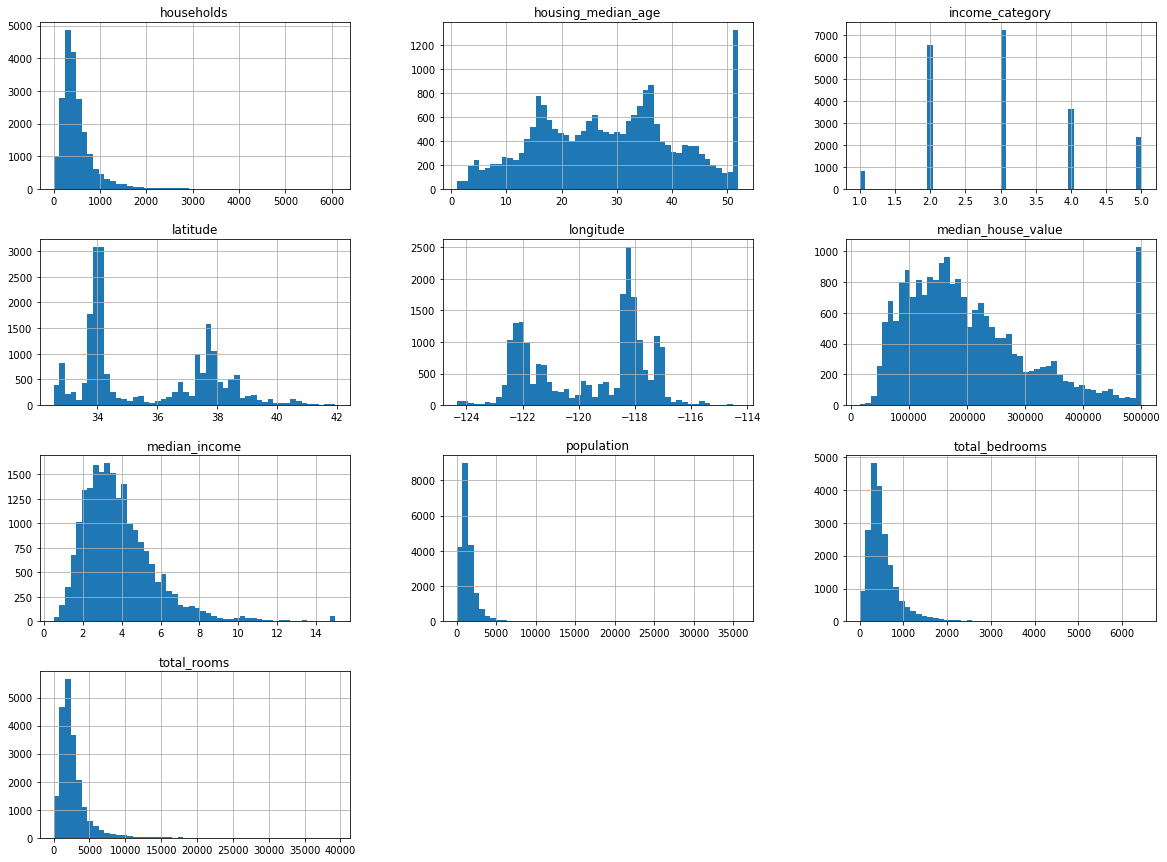

In [15]:
%matplotlib inline # Jupyter specific construct
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print("training set has ", len(train_set), " and test set has ", len(test_set), " elements")


training set has  16512  and test set has  4128  elements


In [47]:
type(housing["income_category"])

pandas.core.series.Series

### https://stackoverflow.com/questions/34667282/numpy-where-detailed-step-by-step-explanation-examples is not the one used here. Refer to https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html

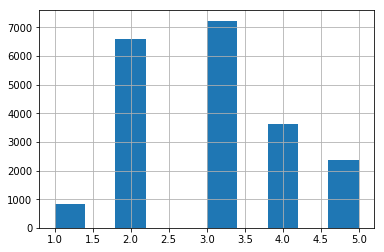

In [13]:
housing["income_category"] = np.ceil(housing["median_income"]/1.5)
housing["income_category"].where(housing["income_category"] < 5, 5.0, inplace=True)
housing["income_category"].hist()
plt.show()

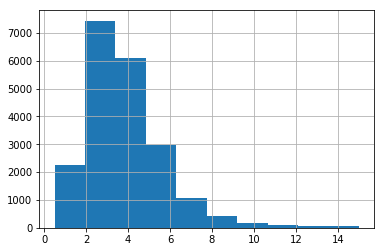

In [14]:
housing["median_income"].hist()
plt.show()

### The following snippet takes a criterion, which happens to be the income category here and then it tries to split the data into training and testing sets in such a way that every "income category" gets a fair representation in the randomized training and test sets. Without this the right model cannot be derived.

### housing is panadas.DataFrame object and the loc function locates instances by labels. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

### So far this is what we have done: Learnt how to download data from an url, untar and save it to a local path. Read this data using pandas and then viewing it using matplotlib. Further we decided to split the data into 2 parts, one to be used to train the model and the other to be used to test it. To make sure that we get proper representation of the distribution, we chose a criterion and then used it to separate 20% data to be used as test data. strat_train_set (stands for stratified training set) is now what would be used for modeling. The other set i.e. the test_set shall be set aside. At this point let us reset the housing data to the training set only.

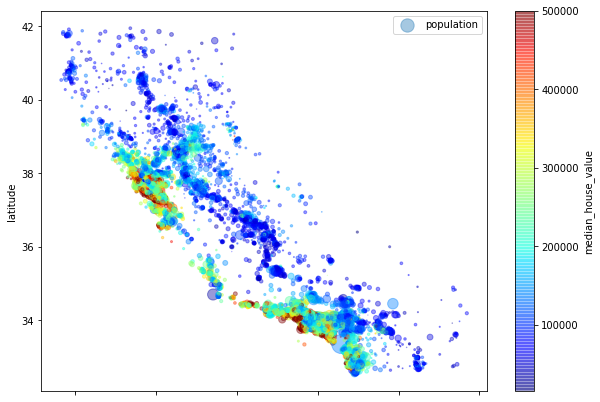

In [51]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [52]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0
19480,-120.97,37.66,24.0,2930.0,588.0,1448.0,570.0,3.5395,127900.0,INLAND,3.0
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN,5.0
13685,-117.24,34.15,26.0,2041.0,293.0,936.0,375.0,6.0000,140200.0,INLAND,4.0
4937,-118.26,33.99,47.0,1865.0,465.0,1916.0,438.0,1.8242,95000.0,<1H OCEAN,2.0
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1.0
